In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [3]:
# creating a variable for the file path and importing the csv with pandas to convert it into a dataframe

file_path_twitter = 'dataset.csv'
file_path_aapl = 'AAPL.csv'
df_twitter = pd.read_csv(file_path_twitter)
df_aapl = pd.read_csv(file_path_aapl)

# taking a look a the top 5 entries of data to get a better understanding of how the data is organized 

df_twitter.head()

,timestamp,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
0,2015-02-26 21:42:53,104,57.0,11,0.0,53.0,35.0,7.0,8.0,3.0,2.0
1,2015-02-26 21:47:53,100,43.0,10,0.0,64.0,41.0,4.0,8.0,2.0,2.0
2,2015-02-26 21:52:53,99,55.0,3,0.0,49.0,32.0,14.0,5.0,2.0,4.0
3,2015-02-26 21:57:53,154,64.0,4,0.0,48.0,36.0,6.0,13.0,36.0,3.0
4,2015-02-26 22:02:53,120,93.0,9,0.0,22.0,32.0,1.0,22.0,8.0,5.0


In [4]:
# converting the values in the timestamp column from strings to datetime values that
# will be easier to utilize later

df_ts = df_twitter['timestamp'].tolist()
new_ts = []
for ts in df_ts:
    x = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S').date()
    new_ts.append(x)

df_twitter['timestamp'] = new_ts
new_ts[0]

datetime.date(2015, 2, 26)

In [5]:
df_twitter.head()

,timestamp,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
0,2015-02-26,104,57.0,11,0.0,53.0,35.0,7.0,8.0,3.0,2.0
1,2015-02-26,100,43.0,10,0.0,64.0,41.0,4.0,8.0,2.0,2.0
2,2015-02-26,99,55.0,3,0.0,49.0,32.0,14.0,5.0,2.0,4.0
3,2015-02-26,154,64.0,4,0.0,48.0,36.0,6.0,13.0,36.0,3.0
4,2015-02-26,120,93.0,9,0.0,22.0,32.0,1.0,22.0,8.0,5.0


<AxesSubplot:xlabel='timestamp', ylabel='Apple'>

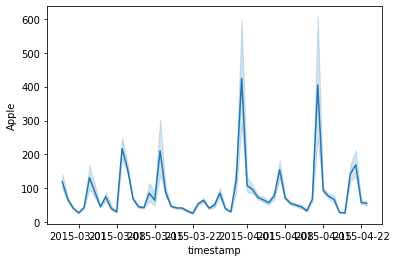

In [6]:
# making a basic lineplot of the amount of times Apple was mentioned over the timeline

sns.lineplot(data=df_twitter, x='timestamp', y='Apple')

In [7]:
# determine the earliest date

earliest_date = df_twitter['timestamp'].iloc[0]
print(earliest_date)

2015-02-26


In [8]:
# taking a look at how the data is organized

df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [9]:
# finding out how the Date value is stored

type(df_aapl['Date'].iloc[0])

str

In [10]:
# changing the Date value from a string to a datetime value to be used more easily later

aapl_date = df_aapl['Date'].tolist()
new_aapl_date = []
for ad in aapl_date:
    x = datetime.strptime(ad, '%Y-%m-%d')
    new_aapl_date.append(x)
    
df_aapl['Date'] = new_aapl_date
df_aapl = df_aapl.rename(columns={'Date':'timestamp'})

In [11]:
# using only the relevant dates from the dataset that contains the stock information

df_aapl_needed = df_aapl.set_index('timestamp').loc[earliest_date:].reset_index()
df_aapl_needed.head()

,timestamp,Open,High,Low,Close,Adj Close,Volume
0,2015-02-26,32.197498,32.717499,31.652500,32.605000,29.598347,365150000
1,2015-02-27,32.500000,32.642502,32.060001,32.115002,29.153534,248059200
2,2015-03-02,32.312500,32.570000,32.075001,32.272499,29.296509,192386800
3,2015-03-03,32.240002,32.380001,32.022499,32.340000,29.357788,151265200
4,2015-03-04,32.275002,32.389999,32.080002,32.134998,29.171682,126665200


In [12]:
# reseting the index of the apple mentions dataframe to default

twitter_aapl = df_twitter.set_index('timestamp')['Apple']
twitter_aapl = twitter_aapl.reset_index()
twitter_aapl.head()

,timestamp,Apple
0,2015-02-26,104
1,2015-02-26,100
2,2015-02-26,99
3,2015-02-26,154
4,2015-02-26,120


In [13]:
# created a function to get the counts of mentions for a specified company

def combine_time(df, col_name_one, col_name_two):
    new_df = dict()
    for x in range(0, len(df)):
        y = df.iloc[x]
        try:
            new_df[y[col_name_one]] += y[col_name_two] 
        except:
            'KeyError'
            new_df[y[col_name_one]] = y[col_name_two]
    return pd.DataFrame({'timestamp':new_df.keys(), 'mentions':new_df.values()})

In [14]:
new_df = combine_time(twitter_aapl, 'timestamp', 'Apple')
new_df.set_index('timestamp').head()

,mentions
timestamp,
2015-02-26,3336
2015-02-27,19498
2015-02-28,11909
2015-03-01,7890
2015-03-02,12426


In [15]:
type(new_df['timestamp'].iloc[0]), type(df_aapl_needed['timestamp'].iloc[0])

(datetime.date, pandas._libs.tslibs.timestamps.Timestamp)

In [16]:
df_ats = df_aapl_needed['timestamp'].tolist()
new_ats = []
for ats in df_ats:
    ats = str(ats)
    x = datetime.strptime(ats, '%Y-%m-%d %H:%M:%S').date()
    new_ats.append(x)

df_aapl_needed['timestamp'] = new_ats
type(df_aapl_needed['timestamp'].iloc[0])

datetime.date

In [17]:
# combining the dataframe that was just made with the dataframe created earlier that has the Apple market data

appl_df_use = pd.merge(df_aapl_needed, new_df, how='inner')

<AxesSubplot:xlabel='timestamp', ylabel='Volume'>

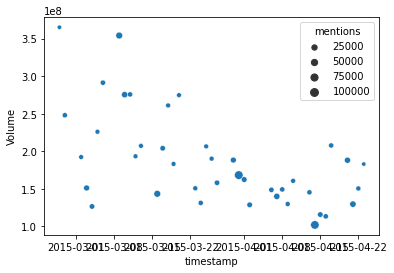

In [18]:
# a scatterplot that illustrates the relationship between the volume traded (y axis) and the amount of twitter mentions (the size)

sns.scatterplot(data=appl_df_use, y='Volume', x='timestamp', size='mentions')